<a href="https://colab.research.google.com/github/A-Elakad/Organic-Grocery-Association-Rules/blob/main/Organic_Grocery_Association_Rules_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform

In [ ]:
main_frame = pd.read_csv('/content/sales.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
main_frame['product_name'].nunique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


225

In [ ]:
main_frame['product_id'].nunique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


240

In [ ]:
main_frame['product_name'].isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


665

In [ ]:
df = main_frame.drop(['order_delivery_cost','product_price','order_total_products_price','product_stock','order_total_price','order_customer_type','order_date'],axis=1)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,product_id,product_name,category_id,category_name,quantity,order_id
0,65c69ee781e808fb28054a36,طماطم فاخر,633eb7d9685e55eb2f02b012,خضروات,4.0,65c76f779634263f010b3a62
1,65c6ac86b138a0346100f765,كرنب مسلوق,63750f318d0151836508a2c2,خضروات جاهزة,1.0,65c76f779634263f010b3a62
2,65c69f50c8da21dfe90ab455,جريب فروت,633eb7e11ef9e97ab70d6ff2,فاكهة,4.0,65c76f779634263f010b3a62
3,65c6ad06b41824de3a0e8105,ليمون اضاليا,633eb7d9685e55eb2f02b012,خضروات,1.0,65c76f779634263f010b3a62
4,65c69ee781e808fb28054a36,طماطم فاخر,633eb7d9685e55eb2f02b012,خضروات,4.0,65c76f77c5c149c84402d922


In [ ]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
product_id,0
product_name,665
category_id,665
category_name,665
quantity,0
order_id,0


In [ ]:
# Replace 'column_name' with the name of the column you want to check
rows_with_null = df[df['product_name'].isnull()]

# Display the rows
rows_with_null['product_id'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['65c69a336fbd3f330902e522', '65c6ad2db41824de3a0e810a',
       '65c6ab58b1cef436b60fc512', '65c6b0018b0b17cfd90c4f45',
       '65c6b2de3b0f70dd0d0721f5', '65c773dcbdf63d214e0bce44',
       '65c6ac532d470f225101de13', '65c69a3f52f83b6f7307a884',
       '65c693a3e437225e2d079122', '65c6b345c1ea7c9ce70e5488',
       '65c69be7434f321680034873', '65c695d3c38dda787c034042',
       '65c69c32434f32168003487c', '65c6b18508ca2a15a500b522',
       '664a0b0324c765989b0dc354'], dtype=object)

In [ ]:
# Assuming 'column_name' is the column where you want to check the occurrences
values_to_check = [
    '65c69a336fbd3f330902e522', '65c6ad2db41824de3a0e810a',
    '65c6ab58b1cef436b60fc512', '65c6b0018b0b17cfd90c4f45',
    '65c6b2de3b0f70dd0d0721f5', '65c773dcbdf63d214e0bce44',
    '65c6ac532d470f225101de13', '65c69a3f52f83b6f7307a884',
    '65c693a3e437225e2d079122', '65c6b345c1ea7c9ce70e5488',
    '65c69be7434f321680034873', '65c695d3c38dda787c034042',
    '65c69c32434f32168003487c', '65c6b18508ca2a15a500b522',
    '664a0b0324c765989b0dc354'
]

# Filter the DataFrame to include only rows where the column contains values from the array
filtered_df = df[df['product_id'].isin(values_to_check)]

# Count occurrences of each value in the filtered DataFrame
value_counts = filtered_df['product_id'].value_counts()

# Display the result
print(value_counts)


product_id
65c69a3f52f83b6f7307a884    354
65c6b0018b0b17cfd90c4f45    164
65c69be7434f321680034873     50
65c69a336fbd3f330902e522     28
65c6ab58b1cef436b60fc512     19
65c695d3c38dda787c034042     17
65c6b2de3b0f70dd0d0721f5      9
65c69c32434f32168003487c      6
664a0b0324c765989b0dc354      6
65c6b18508ca2a15a500b522      5
65c6ad2db41824de3a0e810a      2
65c6ac532d470f225101de13      2
65c773dcbdf63d214e0bce44      1
65c693a3e437225e2d079122      1
65c6b345c1ea7c9ce70e5488      1
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Create a dictionary to map product names to encoded values
product_encoder = {product_name: idx for idx, product_name in enumerate(df['product_name'].unique())}

# Create a reverse dictionary to decode encoded values back to product names
product_decoder = {idx: product_name for product_name, idx in product_encoder.items()}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Apply encoding to the 'product_id' column in the original DataFrame
df['product_name_encoded'] = df['product_name'].map(product_encoder)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Group orders and perform one-hot encoding (assuming 'order_id' is your order identifier column)
grouped_orders = df.groupby('order_id')['product_name_encoded'].apply(list).reset_index()
te = TransactionEncoder()
te_ary = te.fit(grouped_orders['product_name_encoded']).transform(grouped_orders['product_name_encoded'])
df_new = pd.DataFrame(te_ary, columns=te.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


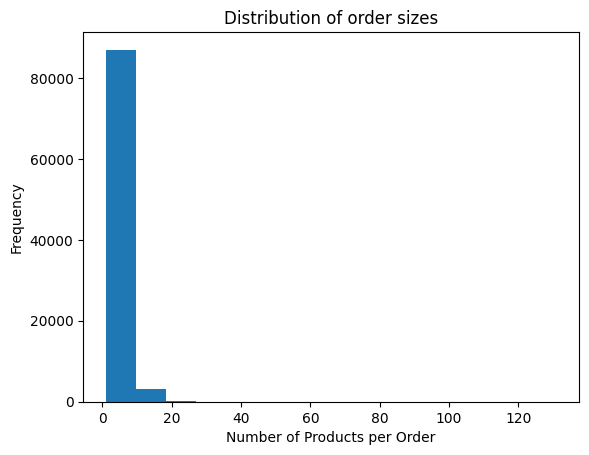

In [ ]:
order_sizes = df.groupby('order_id')['product_name_encoded'].count()

plt.hist(order_sizes, bins=15)
plt.xlabel('Number of Products per Order')
plt.ylabel('Frequency')
_ = plt.title('Distribution of order sizes')

In [ ]:
frequent_itemsets = apriori(df_new, min_support=0.008, use_colnames=True)
#Extract the itemsets as lists from the sets
frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(list)

# One-hot encode the itemsets
mlb = MultiLabelBinarizer()
itemsets_encoded = mlb.fit_transform(frequent_itemsets['itemsets'])

# Create a new DataFrame with one-hot encoded columns
itemsets_encoded_df = pd.DataFrame(itemsets_encoded, columns=mlb.classes_)

print(frequent_itemsets)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


      support              itemsets
0    0.410945                   [0]
1    0.010412                   [4]
2    0.021913                   [6]
3    0.062363                   [7]
4    0.084953                   [8]
..        ...                   ...
510  0.008781   [0, 64, 12, 16, 31]
511  0.008670   [0, 64, 12, 25, 30]
512  0.012244   [0, 64, 16, 25, 30]
513  0.009158   [0, 64, 16, 25, 31]
514  0.008259  [64, 12, 16, 25, 30]

[515 rows x 2 columns]


In [ ]:
# Modify the decode_itemsets function to handle lists of itemsets
def decode_itemsets(itemsets):
    # Decode each item in the list of itemsets
    return {product_decoder[item] for item in itemsets}

# Apply the modified function to decode the itemsets
frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(decode_itemsets)

# Print the decoded itemsets
print(frequent_itemsets)

      support                                           itemsets
0    0.410945                                      {طماطم  فاخر}
1    0.010412                                             {شمام}
2    0.021913                                    {باكت ثوم صيني}
3    0.062363                                              {شبت}
4    0.084953                                      {بقدونس اخضر}
..        ...                                                ...
510  0.008781  {فلفل رومي اخضر, بصل ابيض جديد, خيار, طماطم  ف...
511  0.008670  {فلفل رومي اخضر, ليمون بلدي, طماطم  فاخر, جزر,...
512  0.012244  {خيار, ليمون بلدي, طماطم  فاخر, جزر, بطاطس تحم...
513  0.009158  {بصل ابيض جديد, خيار, ليمون بلدي, طماطم  فاخر,...
514  0.008259  {فلفل رومي اخضر, خيار, ليمون بلدي, جزر, بطاطس ...

[515 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
frequent_itemsets.to_excel('frequent_itemsets (Organic).xlsx', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.75)

rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(7),(9),0.062363,0.070833,0.048121,0.771627,10.893592,0.043704,4.068636,0.968609
1,"(0, 7)",(9),0.036033,0.070833,0.028007,0.777264,10.973179,0.025455,4.171612,0.942842
2,"(16, 9)",(0),0.027119,0.410945,0.020492,0.755628,1.838757,0.009347,2.410487,0.468869
3,"(16, 12)",(0),0.075806,0.410945,0.058967,0.777859,1.892854,0.027814,2.651717,0.510388
4,"(16, 15)",(0),0.032247,0.410945,0.025587,0.793460,1.930816,0.012335,2.852007,0.498148
...,...,...,...,...,...,...,...,...,...,...
117,"(64, 25, 12, 30)",(0),0.010290,0.410945,0.008670,0.842503,2.050158,0.004441,3.740094,0.517559
118,"(0, 25, 64, 30)",(16),0.015263,0.271810,0.012244,0.802182,2.951260,0.008095,3.681108,0.671410
119,"(64, 16, 25, 30)",(0),0.014420,0.410945,0.012244,0.849115,2.066248,0.006318,3.903991,0.523581
120,"(64, 16, 25, 31)",(0),0.010612,0.410945,0.009158,0.862971,2.099965,0.004797,4.298751,0.529420


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Define a function to decode a frozenset of product IDs
def decode_itemset(itemset, product_decoder):
    return {product_decoder[item] for item in itemset}

# Assuming 'antecedents' and 'consequents' are already in a format that decode_itemset can handle
# Decode the 'antecedents' and 'consequents' columns using the product_decoder
rules['antecedents_decoded'] = rules['antecedents'].apply(lambda x: decode_itemset(x, product_decoder))
rules['consequents_decoded'] = rules['consequents'].apply(lambda x: decode_itemset(x, product_decoder))

# Reorder the columns to place 'antecedents_decoded' as the second column and 'consequents_decoded' as the fourth column
cols = rules.columns.tolist()

# Insert 'antecedents_decoded' after 'antecedents' (second column) and 'consequents_decoded' after 'consequents' (fourth column)
cols.insert(1, cols.pop(cols.index('antecedents_decoded')))  # Move 'antecedents_decoded' to second column
cols.insert(3, cols.pop(cols.index('consequents_decoded')))  # Move 'consequents_decoded' to fourth column

# Reorder the DataFrame based on the new column order
rules = rules[cols]

# Display the updated DataFrame to verify
print(rules.head())

  antecedents     antecedents_decoded consequents consequents_decoded  \
0         (7)                   {شبت}         (9)       {كزبرة خضراء}   
1      (0, 7)      {شبت, طماطم  فاخر}         (9)       {كزبرة خضراء}   
2     (16, 9)     {كزبرة خضراء, خيار}         (0)       {طماطم  فاخر}   
3    (16, 12)  {فلفل رومي اخضر, خيار}         (0)       {طماطم  فاخر}   
4    (16, 15)  {خيار, فلفل حامي اخضر}         (0)       {طماطم  فاخر}   

   antecedent support  consequent support   support  confidence       lift  \
0            0.062363            0.070833  0.048121    0.771627  10.893592   
1            0.036033            0.070833  0.028007    0.777264  10.973179   
2            0.027119            0.410945  0.020492    0.755628   1.838757   
3            0.075806            0.410945  0.058967    0.777859   1.892854   
4            0.032247            0.410945  0.025587    0.793460   1.930816   

   leverage  conviction  zhangs_metric  
0  0.043704    4.068636       0.968609  
1  0.02545

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules.to_excel('association_rules (Organic).xlsx', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
